In [26]:
#Import the necessary libraries and the download Hamlet with other resources
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import imageio.v3 as iio
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

target_url = "http://www.gutenberg.org/files/2265/2265.txt"
data = requests.get(target_url)
text = data.text

nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
#Create TextBlob object for processing
blob = TextBlob(text)
words = blob.words
clean_words = [w.lower() for w in words if w.isalpha()]
stops = set(stopwords.words('english'))
clean_words = [w for w in clean_words if w not in stops]

freq = Counter(clean_words)
freq.most_common(10)

#Look at top 20
top20 = freq.most_common(20)
print(top20)

[('ham', 337), ('lord', 211), ('haue', 175), ('king', 173), ('shall', 107), ('hamlet', 106), ('come', 106), ('thou', 105), ('let', 104), ('good', 99), ('hor', 95), ('thy', 90), ('may', 85), ('enter', 85), ('oh', 81), ('like', 79), ('well', 71), ('know', 70), ('would', 69), ('selfe', 68)]


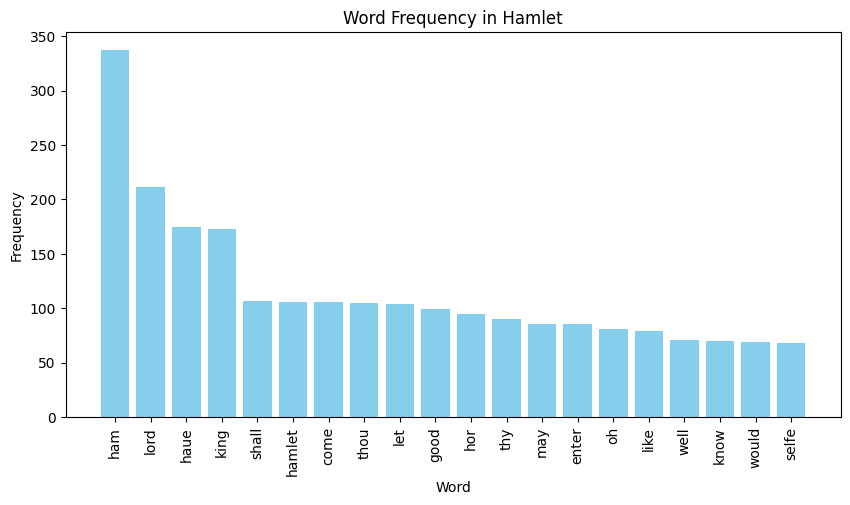

In [29]:
#Plot the data for word frequency on bar chart
words, counts = zip(*top20)

plt.figure(figsize=(10,5))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency in Hamlet')
plt.show()



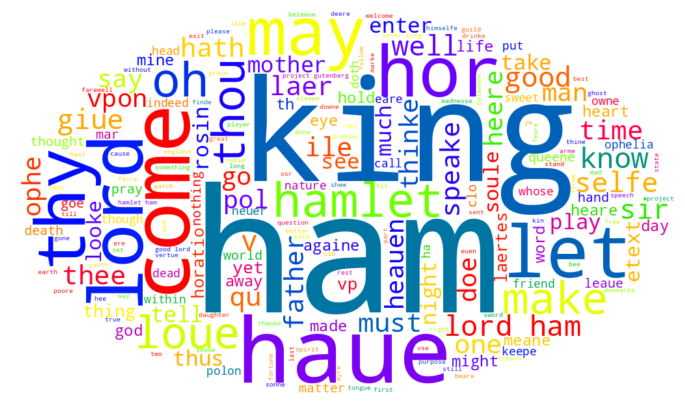

In [32]:
#Generate WordCloud from data and display in oval mask
text_for_wc = " ".join(clean_words)

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = iio.imread(image_file)

wc = WordCloud(background_color='white', colormap='prism', mask= mask_image)
wc.generate(text_for_wc)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()